In [1]:
import _init_paths
import argparse
import numpy as np
from lib.config import cfg
from lib.common.bboxInfoHelper import bboxInfoHelper
from lib.common.keypointPredictor import keypointPredictor
from lib.config import update_config

from lib.common.humanKeypoints import humanKeypoints
from lib.common.visualization import visualization
update_config(cfg)
media_name = ["infant.mov", "infant2.mp4", "infant3.mov", "infant4.mov", "infant5.mov"]

In [2]:
for i in range(len(media_name)):
    boxes = bboxInfoHelper(media_name[i], batch_size=8)
    boxes.predict()

predict Video bboxes...
getVideoFrames finished


  0%|          | 0/2759 [00:00<?, ?it/s]/home/biolab/anaconda3/envs/Wei_env/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 2759/2759 [03:04<00:00, 14.98it/s]


predict Video bboxes...
getVideoFrames finished


100%|██████████| 8716/8716 [10:38<00:00, 13.64it/s]


predict Video bboxes...
getVideoFrames finished


100%|██████████| 2907/2907 [02:44<00:00, 17.71it/s]


predict Video bboxes...
getVideoFrames finished


100%|██████████| 2186/2186 [01:56<00:00, 18.82it/s]


predict Video bboxes...
getVideoFrames finished


100%|██████████| 2082/2082 [01:49<00:00, 18.94it/s]


In [2]:
for i in range(len(media_name)):
    keypoint_info = keypointPredictor(media_name[i])
    keypoint_info.predict()

690it [00:43, 15.71it/s]
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
2152it [02:17, 15.69it/s]
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (f

[0.43908264 0.48349152 0.45324053 0.93103177 0.51297517 1.01074352
 0.60739766 1.1044099  0.7707437  1.34308103 1.00122396 1.2441628
 1.21175292 1.38074339 1.52102459 1.52622491 1.66619588]
(17,)


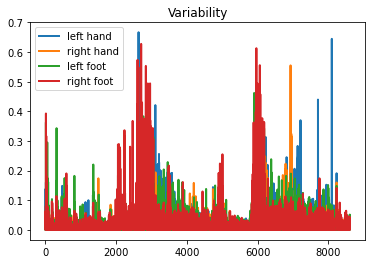

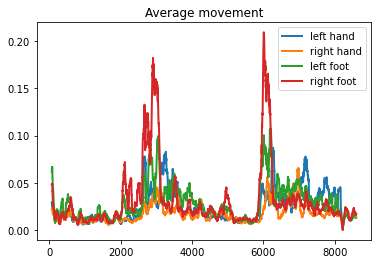

100%|██████████| 8604/8604 [00:31<00:00, 272.12it/s]


In [2]:
from lib.config import cfg
import os
import pandas as pd
import numpy as np
from lib.common.humanKeypoints import humanKeypoints

KeyPoint = humanKeypoints("infant2.mp4")
"infant.mov", "infant2.mp4", "infant3.mov", "infant4.mov", "infant5.mov"
variability = KeyPoint.getKeypointVariability()
mean_variability = np.mean(variability, axis=0)
threshold = mean_variability * 100
print(threshold)

print(np.mean(KeyPoint.getKeypointVariability(), axis= 0).shape)
v = visualization(KeyPoint)
v.draw_variability()
v.draw_average_movement(start_frame=72)
v.save_keypoint_video()
# v.draw_pose()

In [4]:
from typing import List
import numpy as np

infantKeypoints: List[humanKeypoints] = []
for i in range(len(media_name)):
    infantKeypoints.append(humanKeypoints(media_name[i]))

infants_variability = []
for i in range(len(infantKeypoints)):
    infants_variability.append(np.mean(infantKeypoints[i].getKeypointVariability(), axis=0))

infants_variability = np.array(infants_variability)
infants_variability = np.delete(infants_variability, [1,2,3,4], axis=1)


In [10]:
from sklearn.cluster import KMeans
print(infants_variability.shape)
# infants_variability = np.delete(infants_variability, [1,2,3,4], axis=1)

kmeans = KMeans(n_clusters=2, random_state=22).fit(infants_variability)
kmeans.labels_

names = ["台兒經典案例F+ 53w3d", "F+_20190806＿53w6d", "Normal_20190604_44w6d", "台兒經典案例normal 44W5D",
"台兒經典案例normal 45w6d"]

print("KMeans")
for i in range(len(names)):
    print(names[i], ":", kmeans.labels_[i])

(5, 13)
KMeans
台兒經典案例F+ 53w3d : 1
F+_20190806＿53w6d : 1
Normal_20190604_44w6d : 0
台兒經典案例normal 44W5D : 0
台兒經典案例normal 45w6d : 0


In [6]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit_predict(infants_variability)
print(gm)

[1 1 0 0 0]
